In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
# in this line of code we extract the numeric part like 142 min  and convert into float
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)
# we also remove the commas and  dollar signs and convert into float
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '').astype(float)
# we 
df['Genre_Main'] = df['Genre'].str.split(',').str[0]
# this removes rows where any of these three columns (IMDB_Rating, Runtime, Gross) are missing (NaN).
df.dropna(subset=['IMDB_Rating', 'Runtime', 'Gross'], inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7184\3477715346.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    object 
 3   Certificate    785 non-null    object 
 4   Runtime        831 non-null    float64
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     750 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    float64
 16  Genre_Main     831 non-null    object 
dtypes: float64(4), int64(1), object(12)
memory usage: 116.9+ KB

In [19]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [42]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_Main
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime


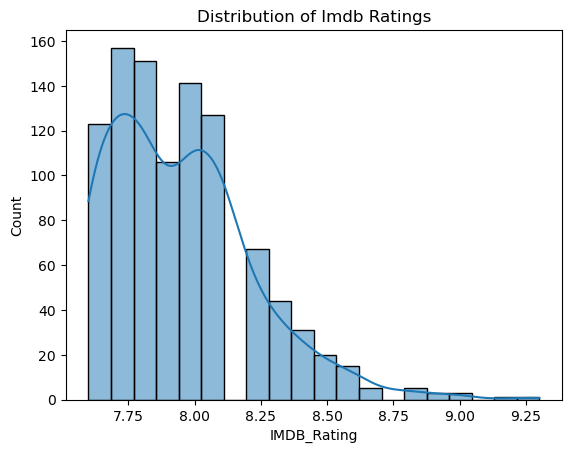

In [21]:
sns.histplot(df["IMDB_Rating"], bins = 20, kde = True)
plt.title("Distribution of Imdb Ratings")
plt.show()

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7184\729365844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "IMDB_Rating", y = "Series_Title", data = top_movies, palette="Set2" )


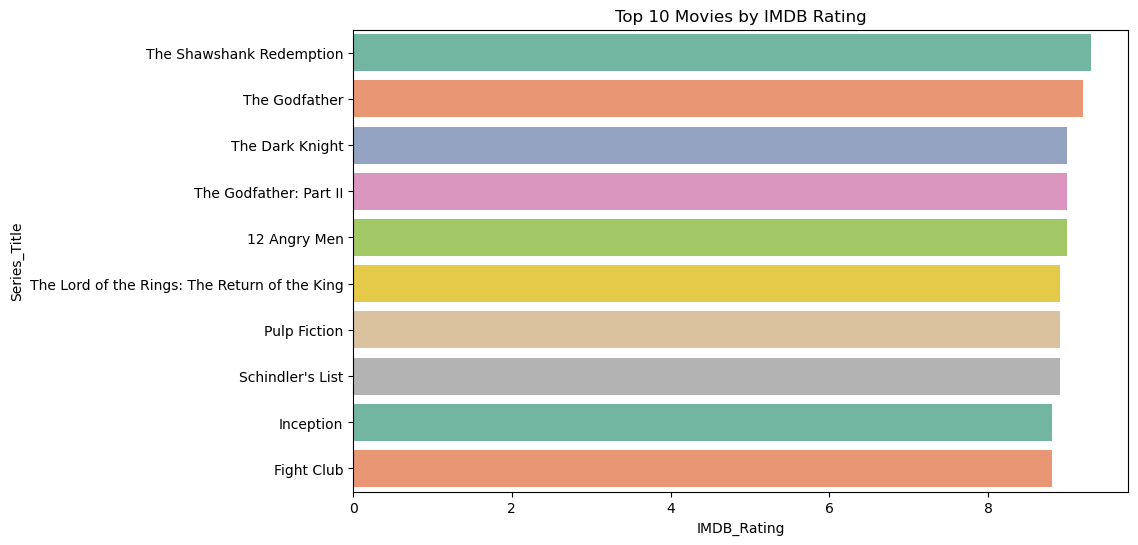

In [22]:
top_movies = df.nlargest(10, "IMDB_Rating")
plt.figure(figsize=(10,6))
sns.barplot(x = "IMDB_Rating", y = "Series_Title", data = top_movies, palette="Set2" )
plt.title("Top 10 Movies by IMDB Rating")
plt.show()

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7184\2710210421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Gross", y = "Genre_Main", data = df, palette="Set2")


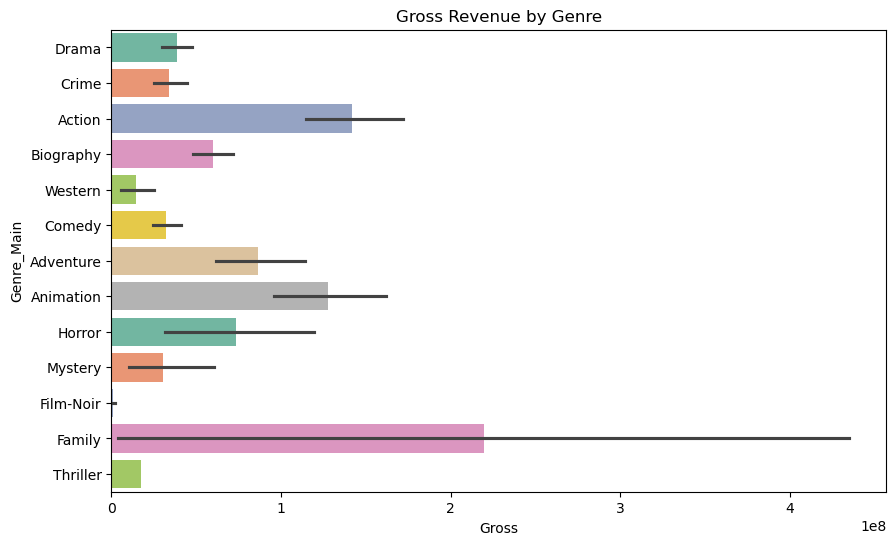

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Gross", y = "Genre_Main", data = df, palette="Set2")
plt.title("Gross Revenue by Genre")
plt.show()

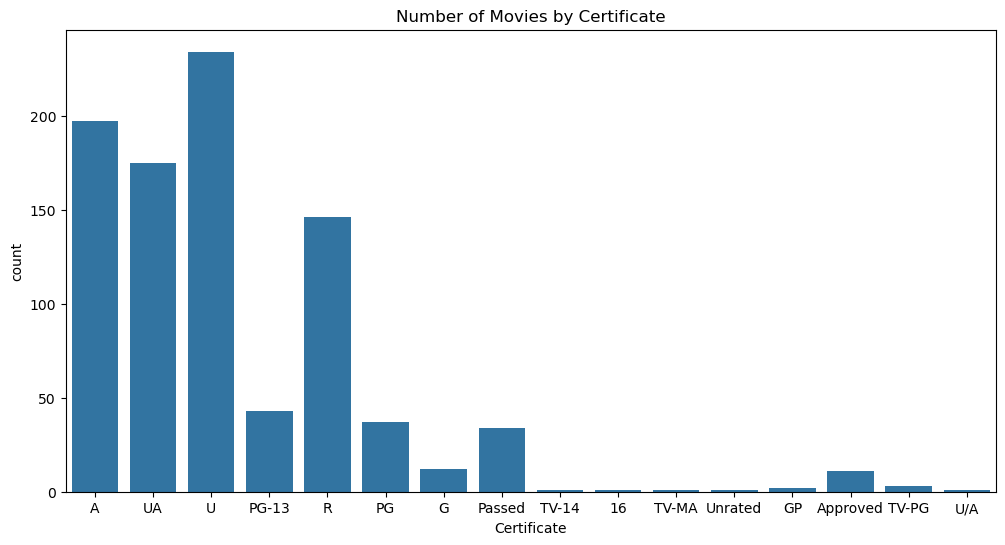

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Certificate', data=df)
plt.title('Number of Movies by Certificate')
plt.show()


C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7184\2216861281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Certificate", y ="Gross", data = df, palette="Set2")


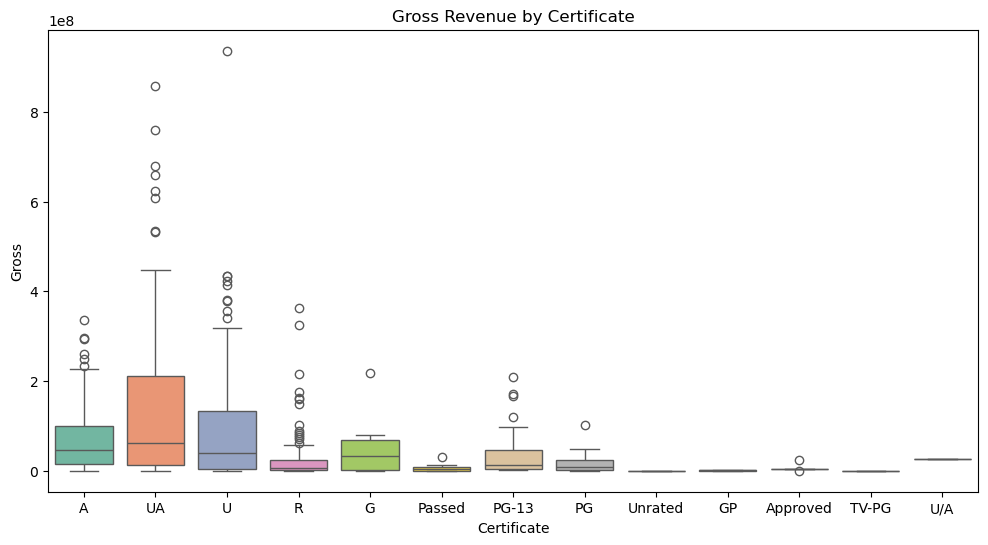

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "Certificate", y ="Gross", data = df, palette="Set2")
plt.title("Gross Revenue by Certificate")
plt.show()

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7184\3373762818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Gross", y = "Director", data = top_movies , palette="Set2" )


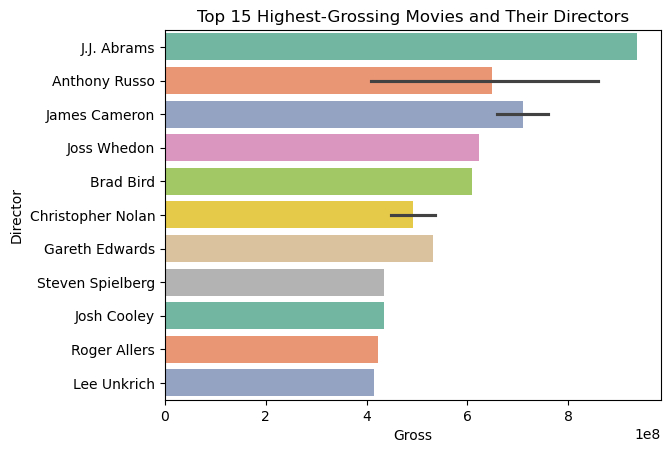

In [45]:
top_movies = df.nlargest(15, "Gross")
plt.Figure(figsize=(36,12))
sns.barplot(x = "Gross", y = "Director", data = top_movies , palette="Set2" )
plt.title("Top 15 Highest-Grossing Movies and Their Directors")
plt.show()